In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn import metrics
import warnings

In [2]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN

In [3]:
#Loading the data
train_data = pd.read_csv('Data Science HW design model.csv')
test_data = pd.read_csv('Data Science HW design val.csv')

In [91]:
train_data
print(train_data['default'].value_counts())

0    90000
1     4000
Name: default, dtype: int64


In [92]:
test_data
print(test_data['default'].value_counts())

0    10000
1     1500
Name: default, dtype: int64


In [6]:
# Train Data Analysis
train_data['default'].value_counts()

0    90000
1     4000
Name: default, dtype: int64

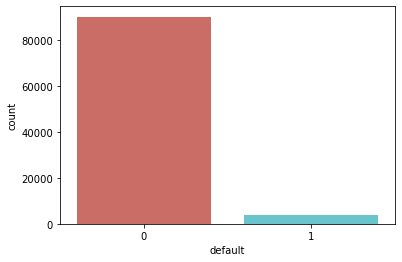

In [7]:
#imbalanced data set
sns.countplot(x='default', data=train_data, palette='hls')
plt.show()

In [8]:
count_no_default = len(train_data[train_data['default']==0])
count_default = len(train_data[train_data['default']==1])
pct_of_no_default = count_no_default/(count_no_default+count_default)
print('\033[1m percentage of no default is', pct_of_no_default*100)
pct_of_default = count_default/(count_no_default+count_default)
print('\033[1m percentage of default', pct_of_default*100)

 percentage of no default is 95.74468085106383
 percentage of default 4.25531914893617


In [9]:
### The classes are highly imbalanced. The ratio of no default to default is 95.75:4.25

In [10]:
train_data.isnull().sum() #finding missing values and handling them

A1         0
A2         0
A3         0
A4         0
A5         0
A6         0
A7         0
A8         0
A9         0
A10        0
A11        0
A12        0
A13        0
A14        0
A15        0
A16        0
A17        0
A18        0
A19        0
A20        0
A21        0
A22        0
A23        0
A24        0
A25        0
A26        0
A27        0
A28        0
A29        0
A30        0
default    0
dtype: int64

In [11]:
train_data.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
count,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,...,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000
mean,12.134211,83.838361,7319.620881,13449.501569,33.507640,36.983300,1.518232,124.108845,1.697824,1.407075,...,0.074435,0.008550,0.013537,0.133531,290.756534,357.976444,103.482568,28.847016,38.509910,0.042553
std,6.587858,8.672843,2652.539364,8197.452662,11.906865,14.209314,1.007398,33.130292,0.776810,0.652138,...,0.138356,0.020052,0.029078,0.156658,471.958770,597.594147,136.248095,62.759062,90.882963,0.201849
min,0.000000,20.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.010000,-0.020000,-0.020000,0.000000,-751.260000,-405.370000,-616.230000,-490.160000,-719.720000,0.000000
25%,7.670000,79.000000,5618.627500,8700.000000,26.880000,28.780000,0.820000,103.027500,1.272000,1.000000,...,0.010000,0.000000,0.000000,0.060000,0.000000,0.000000,14.970000,0.000000,0.000000,0.000000
50%,12.020000,84.360000,7285.590000,11862.650000,32.770000,35.940000,1.420000,127.240000,1.667000,1.399000,...,0.030000,0.000000,0.010000,0.090000,115.140000,102.265000,59.350000,10.500000,0.000000,0.000000
75%,16.080000,89.670000,8780.870000,15896.575000,39.100000,43.830000,2.020000,143.100000,2.064000,1.714000,...,0.080000,0.010000,0.010000,0.140000,380.142500,485.880000,140.952500,34.860000,49.862500,0.000000
max,62.710000,100.000000,26333.500000,170300.000000,146.000000,146.000000,18.670000,524.000000,44.000000,44.000000,...,5.300000,0.700000,1.690000,4.080000,15288.660000,19503.760000,3265.980000,6561.930000,13487.000000,1.000000


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94000 entries, 0 to 93999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       94000 non-null  float64
 1   A2       94000 non-null  float64
 2   A3       94000 non-null  float64
 3   A4       94000 non-null  float64
 4   A5       94000 non-null  float64
 5   A6       94000 non-null  float64
 6   A7       94000 non-null  float64
 7   A8       94000 non-null  float64
 8   A9       94000 non-null  float64
 9   A10      94000 non-null  float64
 10  A11      94000 non-null  float64
 11  A12      94000 non-null  float64
 12  A13      94000 non-null  float64
 13  A14      94000 non-null  float64
 14  A15      94000 non-null  float64
 15  A16      94000 non-null  float64
 16  A17      94000 non-null  float64
 17  A18      94000 non-null  float64
 18  A19      94000 non-null  float64
 19  A20      94000 non-null  float64
 20  A21      94000 non-null  int64  
 21  A22      940

In [13]:
# # Baseline Logistic Model
# X = train_data.drop('default',axis=1)
# y = train_data['default']
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,stratify=y,random_state=42)

# # fit the model
# model = LogisticRegression()
# model.fit(X_train, y_train)
# # evaluate the model
# yhat = model.predict(X_test)
# # evaluate predictions
# # roc_curve = roc_curve(y_test, yhat)
# # print (roc_curve)
# confusion_matrix = confusion_matrix(y_test,yhat)
# from sklearn.metrics import classification_report
# target_names = ['class 0', 'class 1']
# print(classification_report(y_test, yhat, target_names=target_names))

In [14]:
# plt.figure(dpi=80)
# sns.heatmap(confusion_matrix,annot=True,fmt='g',cmap='Blues',linecolor='b',linewidths=0.2)
# plt.ylabel('True Class',fontsize=14)
# plt.yticks(fontsize=12)
# plt.xlabel('Predicted Class',fontsize=14)
# plt.xticks(fontsize=12)
# plt.suptitle('Confusion Matrix',fontsize=16)

In [15]:
# Outlier Detection, Analysis and Treatment

C:\Users\BINALS~1\AppData\Local\Temp/ipykernel_24100/3617356211.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


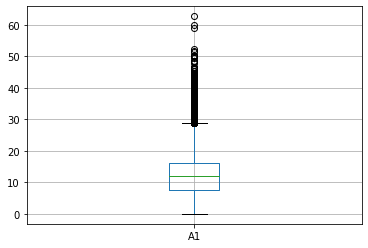

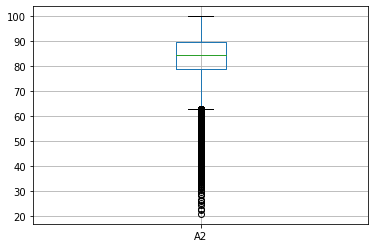

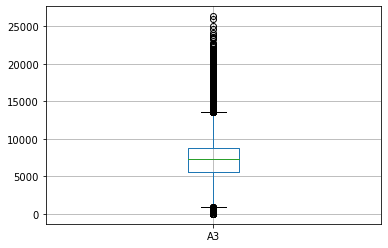

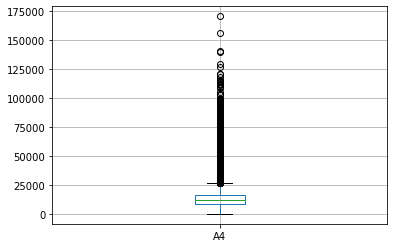

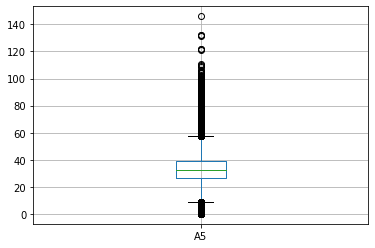

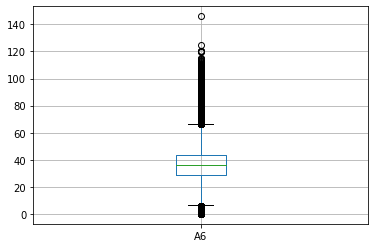

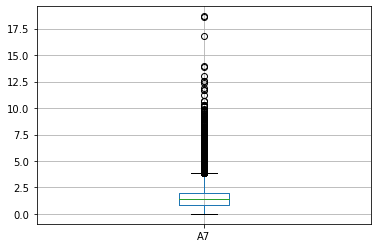

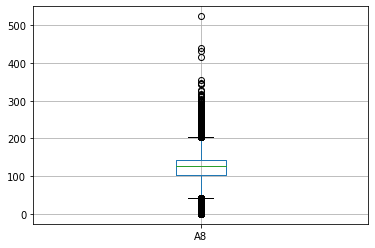

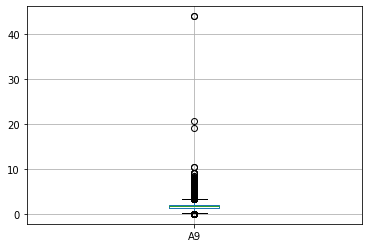

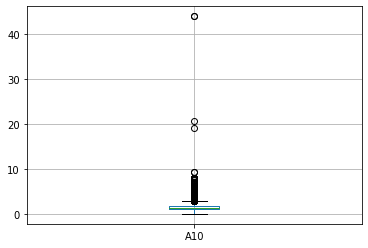

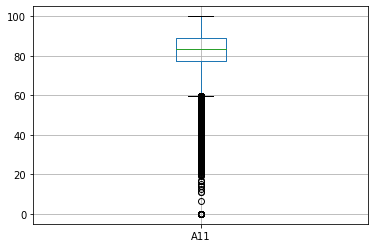

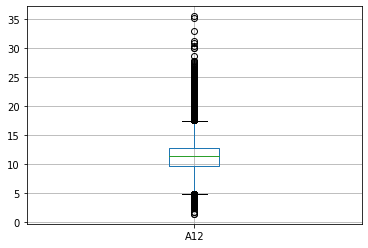

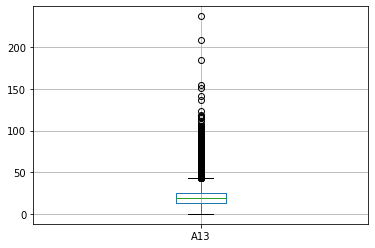

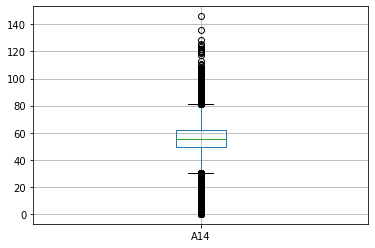

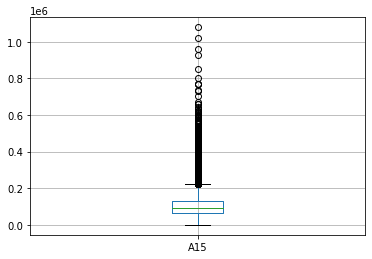

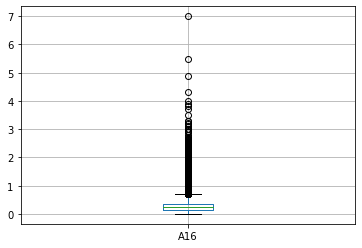

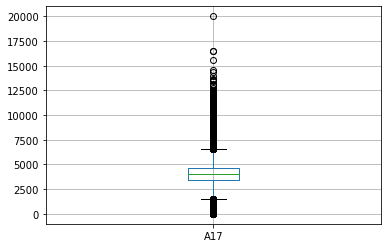

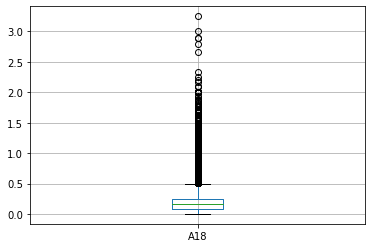

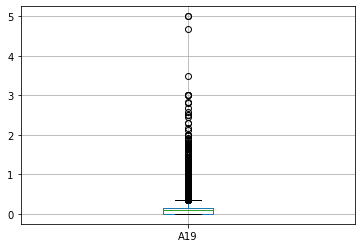

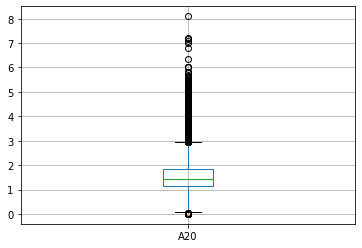

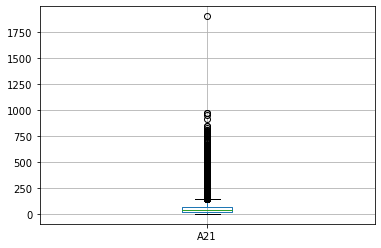

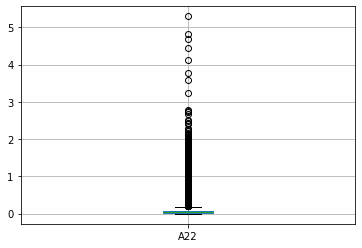

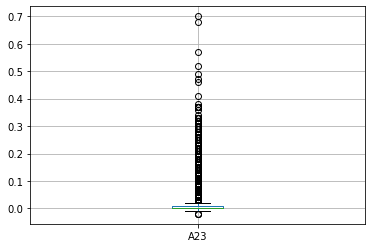

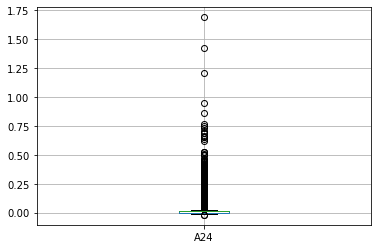

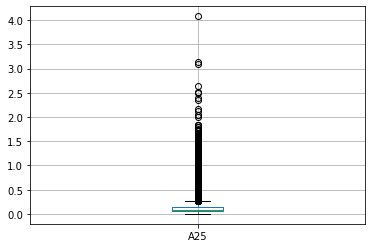

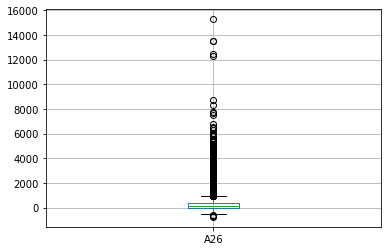

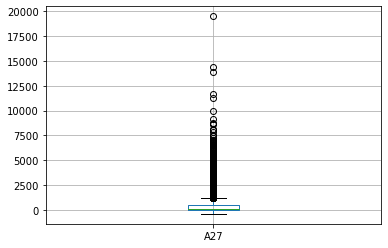

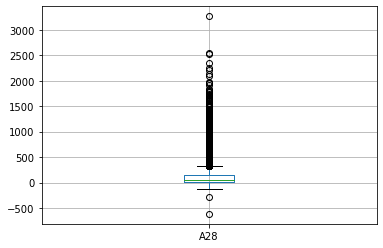

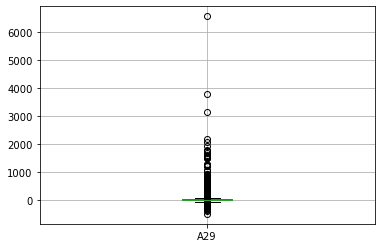

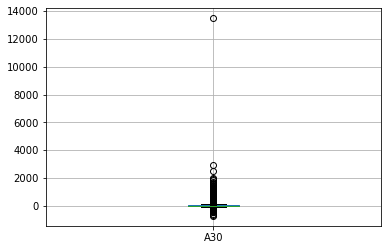

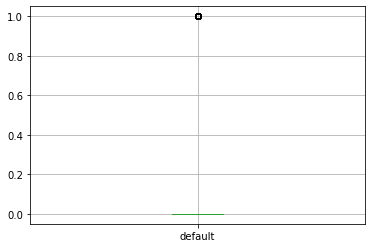

In [16]:
for column in train_data:
    plt.figure()
    train_data.boxplot([column])

In [17]:
# From analyzing the data looks like there are two many outiers in every varaible so will need to do an outlier analysis and outlier treatment

C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

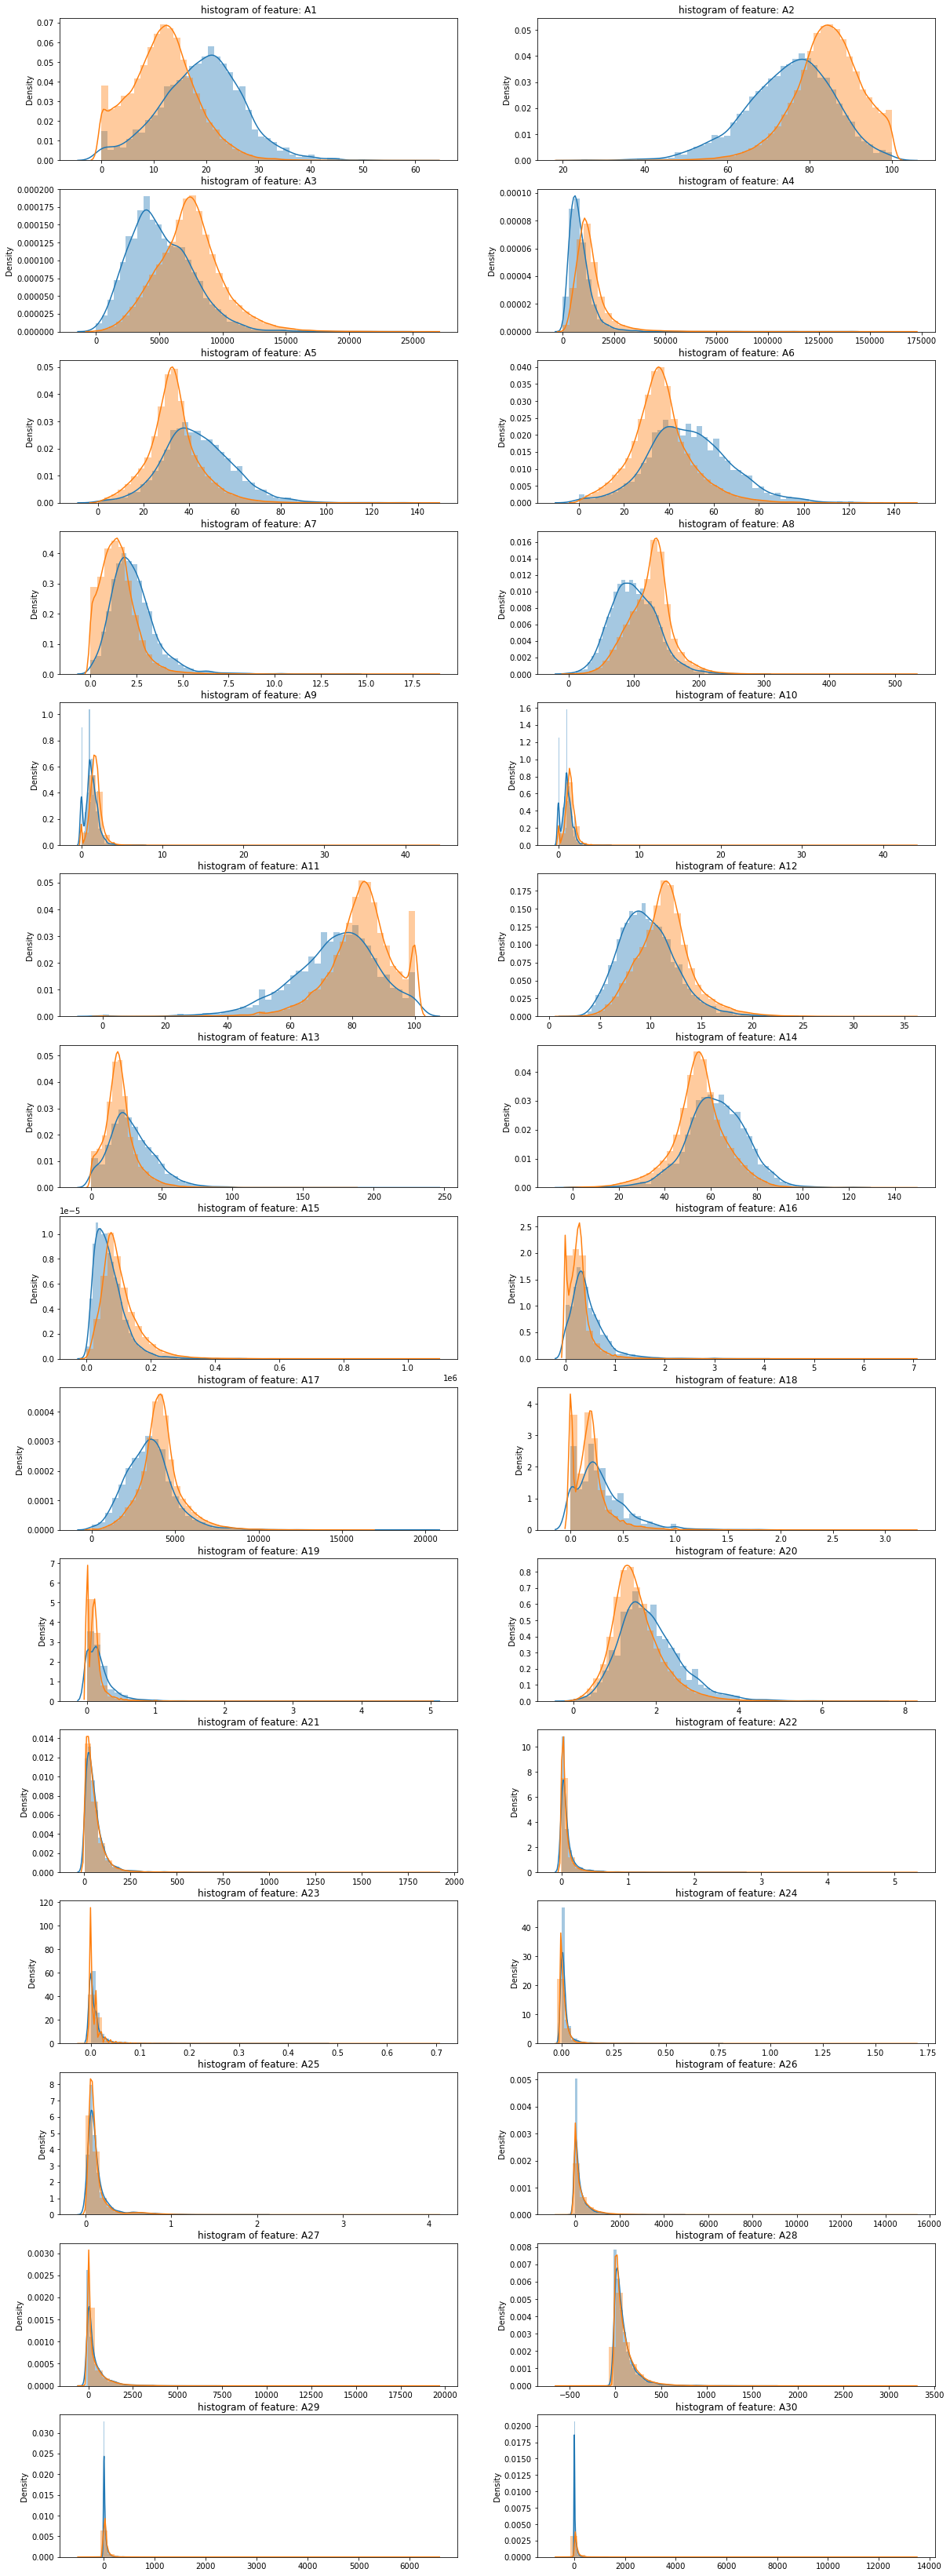

In [18]:
features = train_data.drop('default',axis=1).columns

plt.figure(figsize=(20,50*4))
gs = GridSpec(50, 2)
for i, cn in enumerate(train_data[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(train_data[cn][train_data.default == 1], bins=50)
    sns.distplot(train_data[cn][train_data.default == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

dist plot of: A1


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


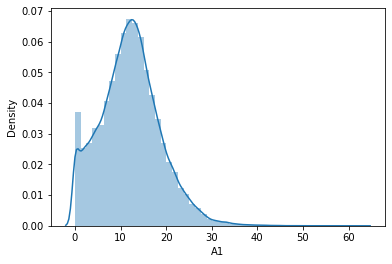

dist plot of: A2


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


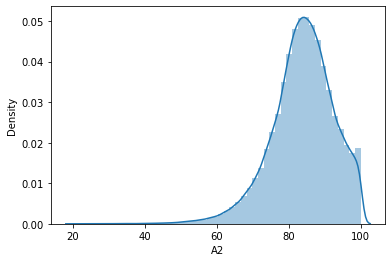

dist plot of: A3


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


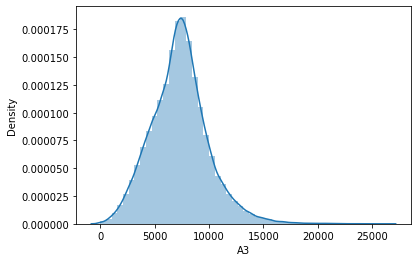

dist plot of: A4


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


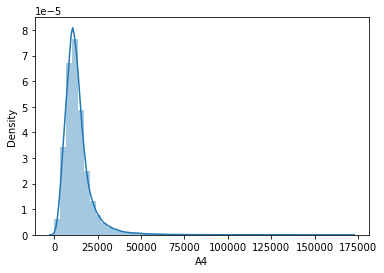

dist plot of: A5


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


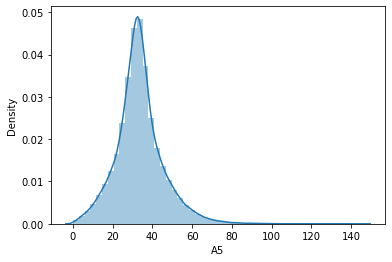

dist plot of: A6


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


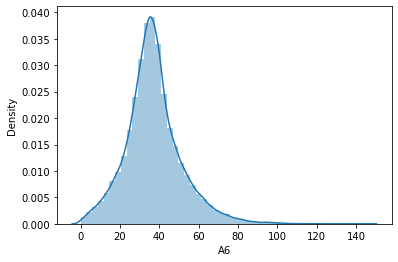

dist plot of: A7


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


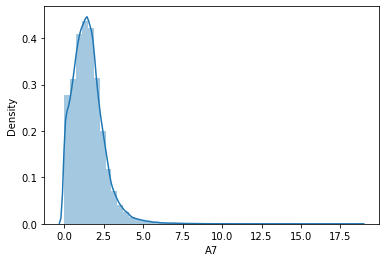

dist plot of: A8


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


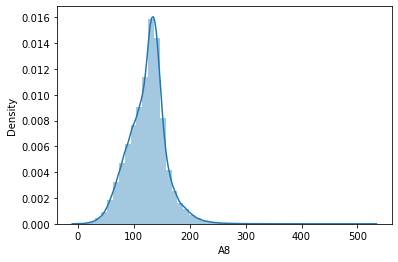

dist plot of: A9


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


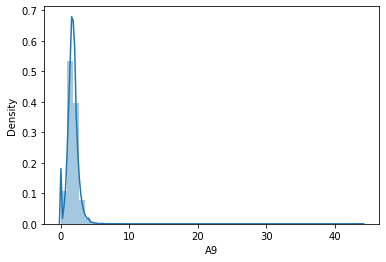

dist plot of: A10


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


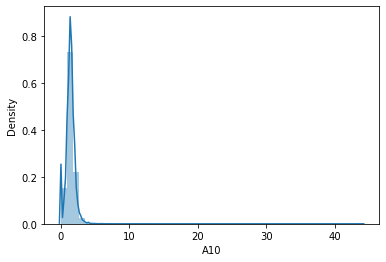

dist plot of: A11


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


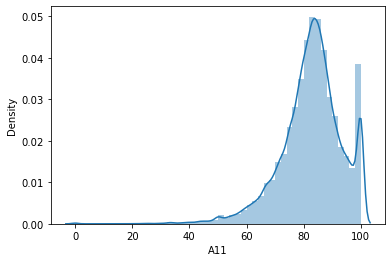

dist plot of: A12


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


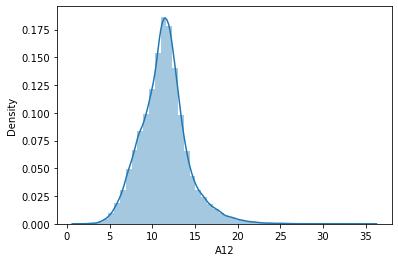

dist plot of: A13


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


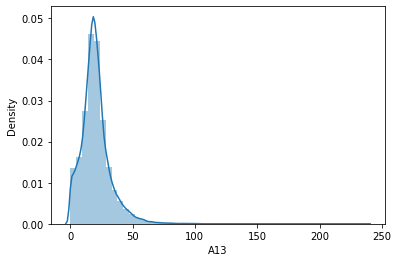

dist plot of: A14


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


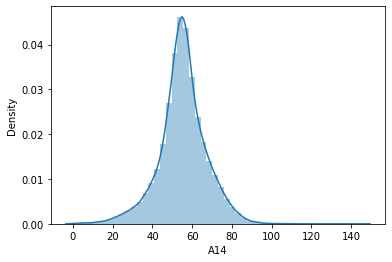

dist plot of: A15


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


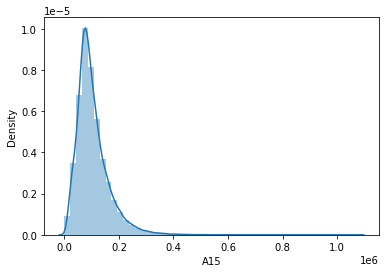

dist plot of: A16


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


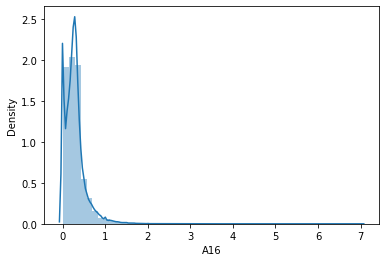

dist plot of: A17


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


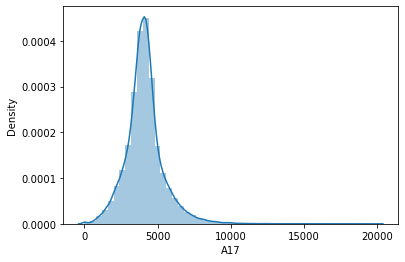

dist plot of: A18


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


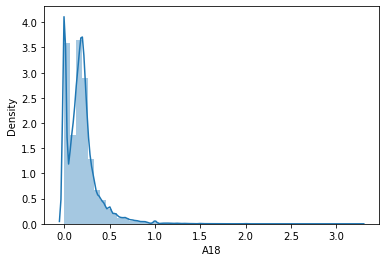

dist plot of: A19


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


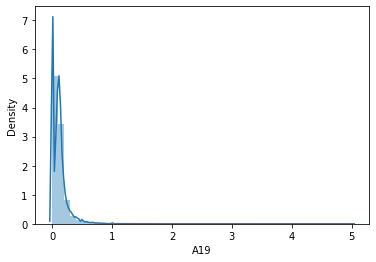

dist plot of: A20


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


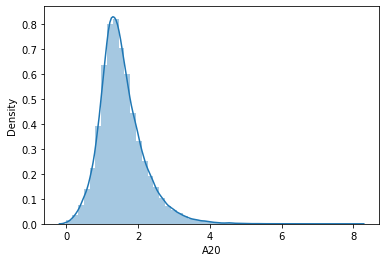

dist plot of: A21


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


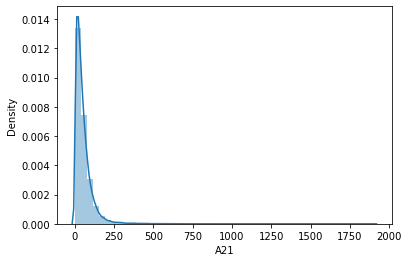

dist plot of: A22


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


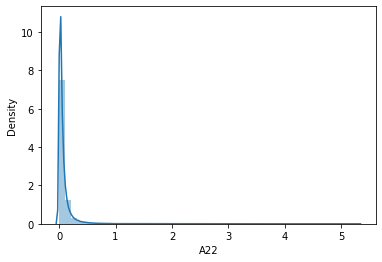

dist plot of: A23


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


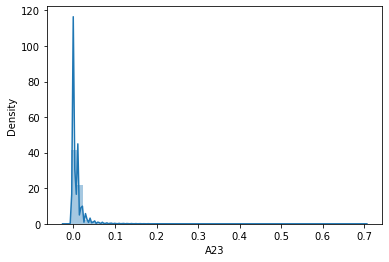

dist plot of: A24


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


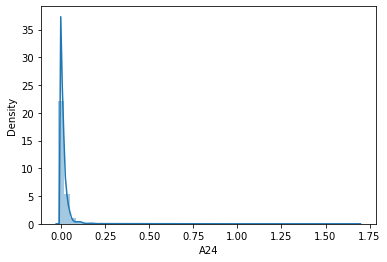

dist plot of: A25


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


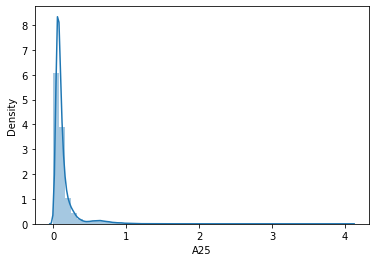

dist plot of: A26


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


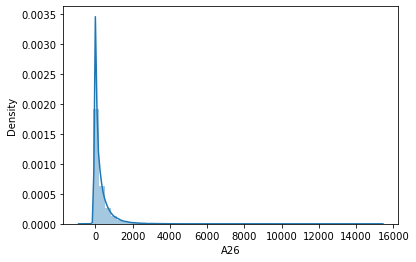

dist plot of: A27


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


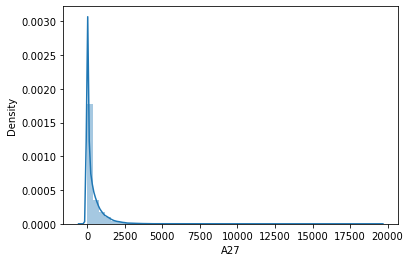

dist plot of: A28


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


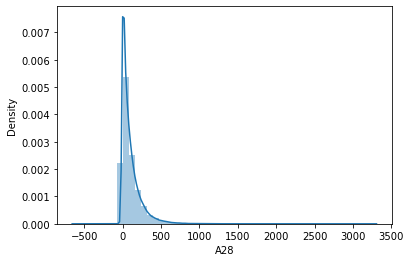

dist plot of: A29


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


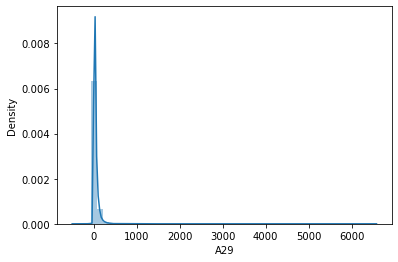

dist plot of: A30


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


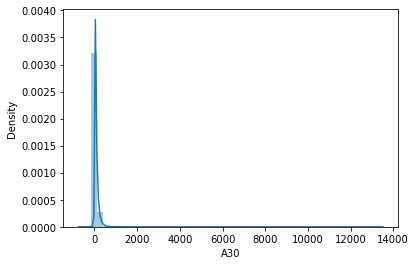

dist plot of: A31


C:\Users\Binal Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


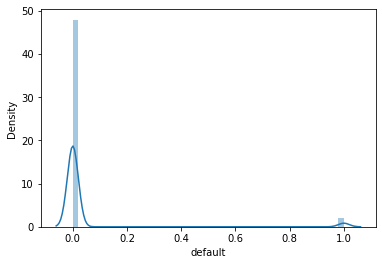

In [19]:
for i in range (0,len(train_data.columns)):
    print ("dist plot of:" + " " + "A" + str (i+1))
    sns.distplot(train_data.iloc[:,i])
    plt.show()

In [20]:
# A14 dist looks normally distributed and zscore method can be applied but all the other varaibles are right/left skewed or have other distributions, hence applying winsorization
# ### For A14 using Capping
# upper_limit = train_data['A14'].mean() + 3*train_data['A14'].std()
# lower_limit = train_data['A14'].mean() - 3*train_data['A14'].std()
# train_data['A14'] = np.where(train_data['A14']>upper_limit,
#                             upper_limit,
#                             np.where(
#                             train_data['A14']<lower_limit,
#                             lower_limit,
#                             train_data['A14']))
# train_data['A14'].describe()

C:\Users\BINALS~1\AppData\Local\Temp/ipykernel_24100/160257653.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


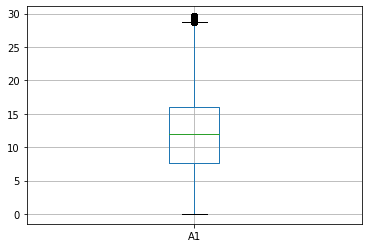

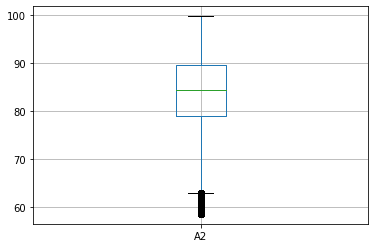

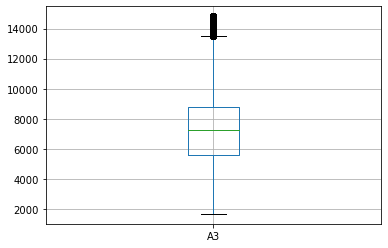

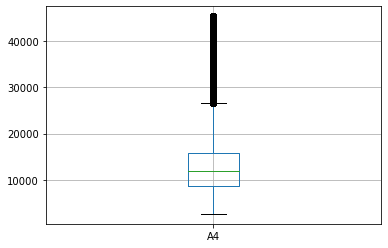

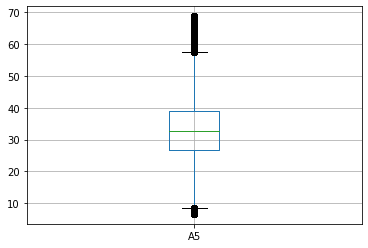

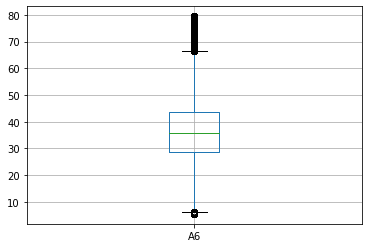

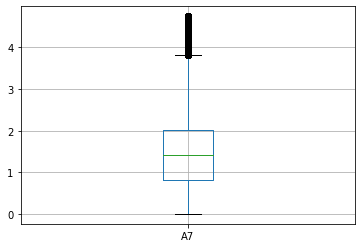

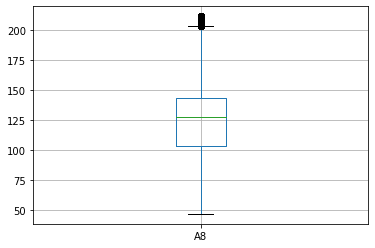

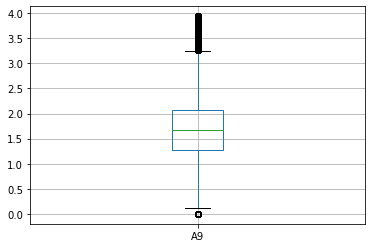

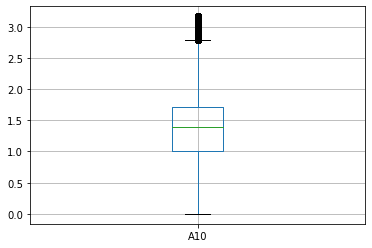

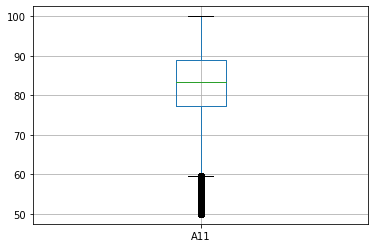

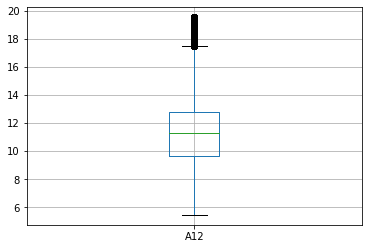

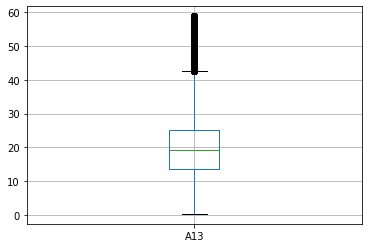

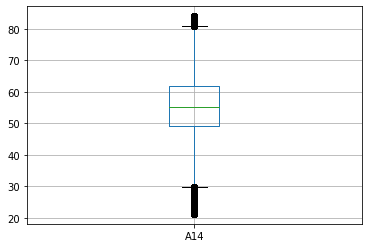

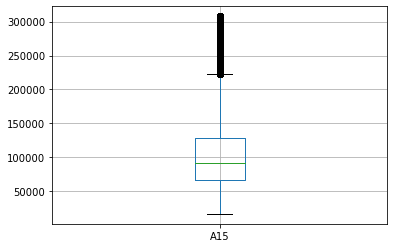

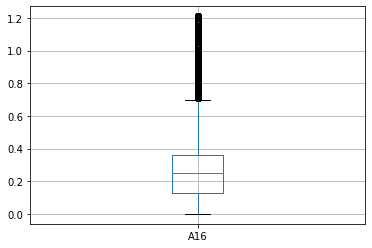

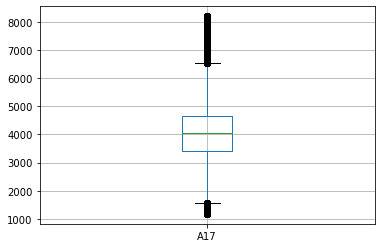

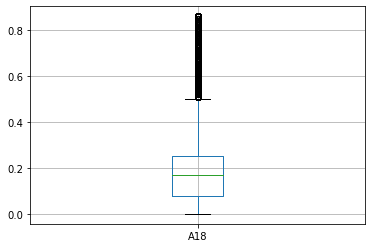

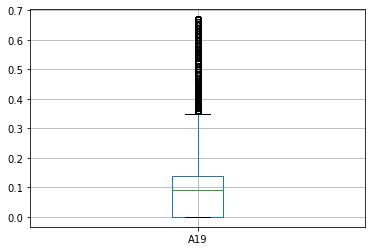

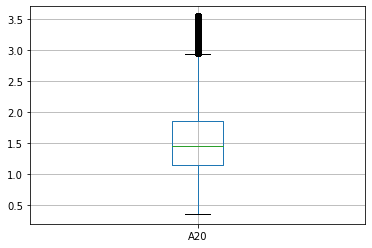

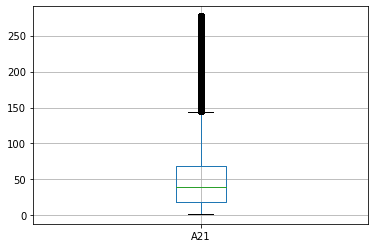

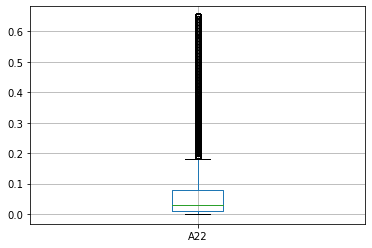

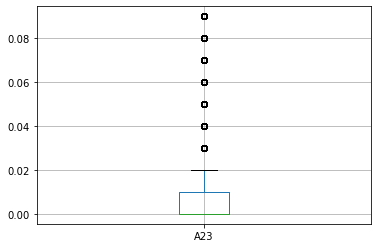

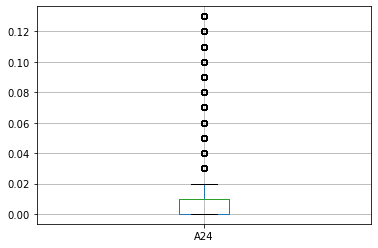

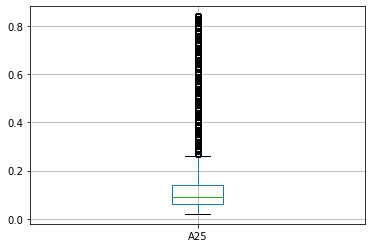

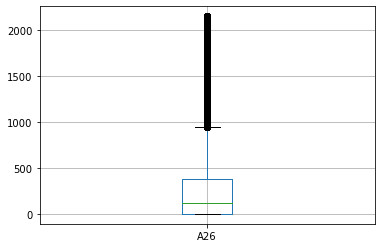

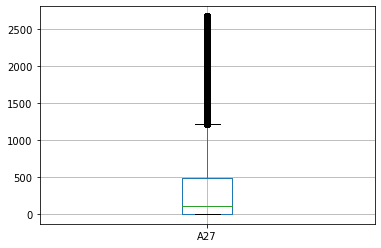

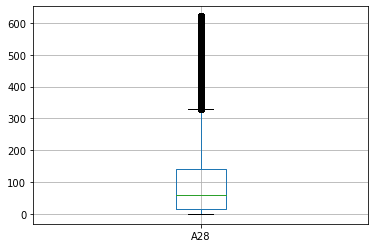

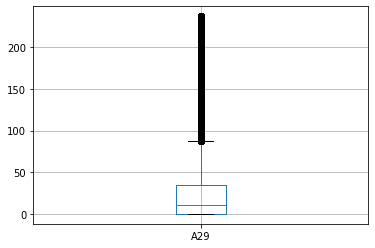

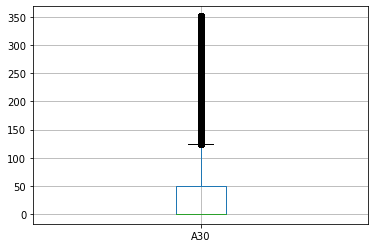

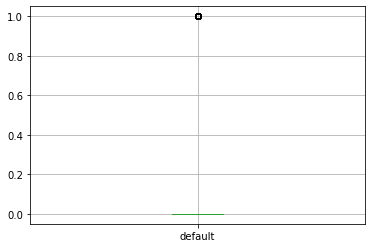

In [22]:
# Checking for outliers and boxplot after treatment
for column in train_data:
    plt.figure()
    train_data.boxplot([column])

In [23]:
train_data.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
count,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,...,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000
mean,12.089619,83.900118,7306.607849,13316.745372,33.445120,36.914859,1.505615,123.998857,1.689535,1.398635,...,0.070514,0.007964,0.012702,0.131678,283.185258,348.578343,101.195204,27.496314,37.089962,0.042553
std,6.438102,8.429457,2572.923749,7328.482915,11.510369,13.822380,0.946126,32.074191,0.716401,0.584198,...,0.104299,0.015064,0.020921,0.143973,417.391604,536.848634,121.809225,42.675953,66.486199,0.201849
min,0.000000,58.630000,1673.707900,2604.973800,6.700000,5.500000,0.000000,46.570000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.670000,79.000000,5618.627500,8700.000000,26.880000,28.780000,0.820000,103.027500,1.272000,1.000000,...,0.010000,0.000000,0.000000,0.060000,0.000000,0.000000,14.970000,0.000000,0.000000,0.000000
50%,12.020000,84.360000,7285.590000,11862.650000,32.770000,35.940000,1.420000,127.240000,1.667000,1.399000,...,0.030000,0.000000,0.010000,0.090000,115.140000,102.265000,59.350000,10.500000,0.000000,0.000000
75%,16.080000,89.670000,8780.870000,15896.575000,39.100000,43.830000,2.020000,143.100000,2.064000,1.714000,...,0.080000,0.010000,0.010000,0.140000,380.142500,485.880000,140.952500,34.860000,49.862500,0.000000
max,29.600100,99.710000,14814.796100,45393.559000,68.670000,79.500000,4.750000,211.750000,3.938000,3.167000,...,0.650000,0.090000,0.130000,0.840000,2154.961300,2677.965700,621.222700,237.201100,351.550200,1.000000


In [24]:
# Baseline Logistic Model - After Outlier Treatment
X = train_data.drop('default',axis=1)
y = train_data['default']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,stratify=y,random_state=42)

# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
# roc_curve = roc_curve(y_test, yhat)
# print (roc_curve)
cm = confusion_matrix(y_test,yhat)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, yhat, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      1.00      0.98     29700
     class 1       0.00      0.00      0.00      1320

    accuracy                           0.96     31020
   macro avg       0.48      0.50      0.49     31020
weighted avg       0.92      0.96      0.94     31020



C:\Users\Binal Shah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 0.98, 'Confusion Matrix')

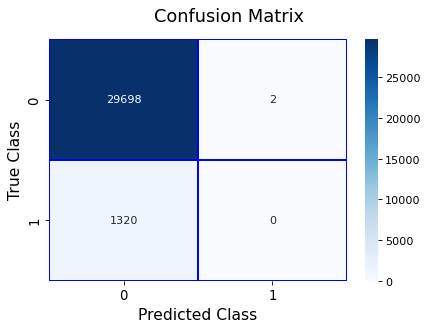

In [25]:
plt.figure(dpi=80)
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues',linecolor='b',linewidths=0.2)
plt.ylabel('True Class',fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Predicted Class',fontsize=14)
plt.xticks(fontsize=12)
plt.suptitle('Confusion Matrix',fontsize=16)

In [26]:
#Feature Selection
### Correlation Analysis

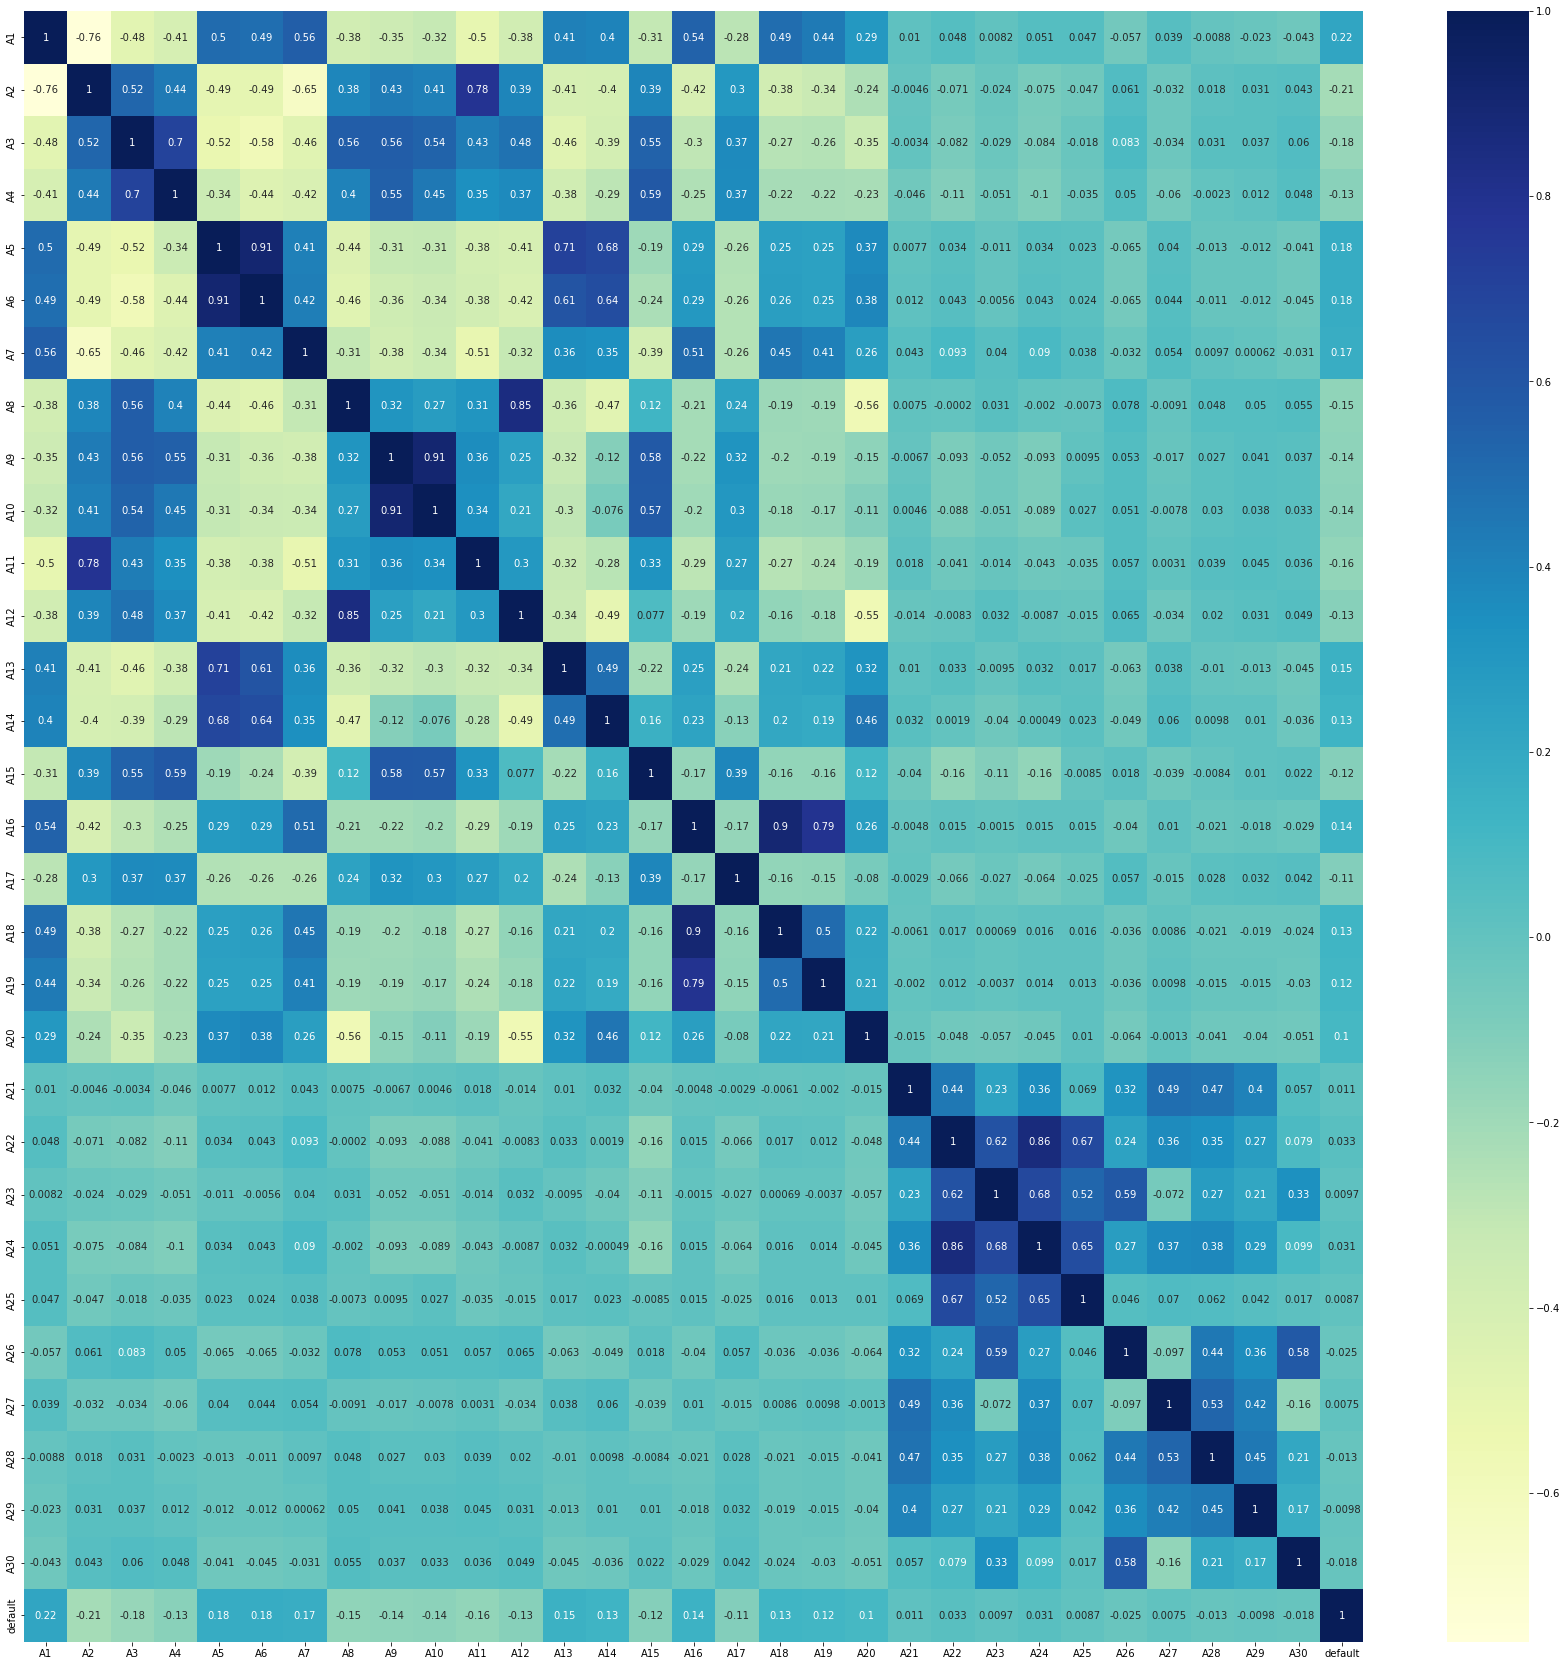

In [27]:
plt.figure(figsize=(30,30))

dataplot = sns.heatmap(train_data.corr(), cmap="YlGnBu", annot=True)

In [28]:
def get_redundant_pairs(train_data):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = train_data.columns
    for i in range(0, train_data.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(train_data, n=5):
    au_corr = train_data.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(train_data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_data, 15))

Top Absolute Correlations
A5   A6     0.907798
A9   A10    0.907058
A16  A18    0.897981
A22  A24    0.864567
A8   A12    0.849188
A16  A19    0.787260
A2   A11    0.781965
A1   A2     0.760884
A5   A13    0.709076
A3   A4     0.703001
A5   A14    0.682227
A23  A24    0.675593
A22  A25    0.667949
A24  A25    0.648965
A2   A7     0.646159
dtype: float64


In [29]:
train_data.corr()['default'].apply(abs).sort_values(ascending=False)

default    1.000000
A1         0.219913
A2         0.210969
A5         0.178544
A6         0.176466
A3         0.175420
A7         0.169740
A11        0.158899
A8         0.151396
A13        0.149127
A9         0.142702
A16        0.140912
A10        0.138553
A4         0.134353
A14        0.126442
A12        0.126179
A18        0.125020
A19        0.117052
A15        0.116125
A17        0.108646
A20        0.102821
A22        0.033449
A24        0.031165
A26        0.024752
A30        0.017714
A28        0.012588
A21        0.011093
A29        0.009848
A23        0.009734
A25        0.008730
A27        0.007510
Name: default, dtype: float64

## There is not so strong correlation between Target Variable and Predictor variables.

In [30]:
# Multicollinearity (VIF) checking

In [31]:
train_data_copy = train_data.copy()

In [32]:
# the independent variables set
X = train_data_copy.drop('default',axis=1)

  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]  
print(vif_data)

   feature         VIF
0       A1    9.814478
1       A2  257.741787
2       A3   29.348819
3       A4   12.326374
4       A5   84.313650
5       A6   55.083923
6       A7    6.857535
7       A8   68.459088
8       A9   43.785573
9      A10   42.299929
10     A11  177.667495
11     A12   74.079175
12     A13    9.636844
13     A14   65.938560
14     A15   14.145303
15     A16   58.315430
16     A17   15.034487
17     A18   26.997090
18     A19   10.958877
19     A20   13.363034
20     A21    4.040967
21     A22    7.482320
22     A23    4.608013
23     A24    7.476183
24     A25    4.507772
25     A26    4.624867
26     A27    3.975508
27     A28    3.614906
28     A29    2.148976
29     A30    2.047133


In [33]:
# Due to high VIF and collinearity dropping A2,A5,A9,A16,A12,A3,A24

In [34]:
train_data_aft_drop = train_data.drop(['A2','A5','A9','A16','A12','A3','A24'], axis=1)

In [35]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = train_data_aft_drop.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(train_data_aft_drop.values, i)
                          for i in range(len(train_data_aft_drop.columns))]  
print(vif_data)

    feature        VIF
0        A1   9.046394
1        A4   9.068311
2        A6  20.583953
3        A7   6.794446
4        A8  24.330028
5       A10  11.329573
6       A11  50.903065
7       A13   7.581802
8       A14  56.517523
9       A15  12.846411
10      A17  14.833811
11      A18   3.654373
12      A19   2.677553
13      A20  12.277601
14      A21   3.960047
15      A22   5.135612
16      A23   3.905731
17      A25   4.375607
18      A26   4.619649
19      A27   3.659156
20      A28   3.600417
21      A29   2.147345
22      A30   2.045209
23  default   1.114354


In [36]:
# Due to high VIF dropping A6,A8,A11,A14,A15,A17

In [37]:
train_data_aft_drop = train_data_aft_drop.drop(['A6','A8','A11','A14', 'A15','A17'], axis=1)

In [38]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = train_data_aft_drop.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(train_data_aft_drop.values, i)
                          for i in range(len(train_data_aft_drop.columns))]  
print(vif_data)

    feature       VIF
0        A1  8.052048
1        A4  5.055393
2        A7  5.838072
3       A10  7.441600
4       A13  5.507837
5       A18  3.630329
6       A19  2.669907
7       A20  7.891029
8       A21  3.912748
9       A22  5.085775
10      A23  3.891379
11      A25  4.313590
12      A26  4.612377
13      A27  3.655723
14      A28  3.597902
15      A29  2.146292
16      A30  2.035949
17  default  1.109627


In [39]:
# Scaling the Data

In [40]:
train_data_1 = train_data_aft_drop.copy()
X = train_data_1.drop('default',axis=1)
y = train_data_1['default']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,stratify=y,random_state=42)
y_train.value_counts()

0    60300
1     2680
Name: default, dtype: int64

In [41]:
robust_scaler = RobustScaler()
X_train1 = robust_scaler.fit_transform(X_train)
X_test1 = robust_scaler.transform(X_test)

In [42]:
X_train1 = pd.DataFrame(data=X_train1,columns=X.columns)

In [43]:
# fit the logistic model
model_lr = LogisticRegression()
model_lr.fit(X_train1, y_train)
# evaluate the model
yhat = model_lr.predict(X_test1)
# evaluate predictions
# roc_curve = roc_curve(y_test, yhat)
# print (roc_curve)
cm = confusion_matrix(y_test,yhat)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, yhat, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      1.00      0.98     29700
     class 1       0.54      0.02      0.04      1320

    accuracy                           0.96     31020
   macro avg       0.75      0.51      0.51     31020
weighted avg       0.94      0.96      0.94     31020



C:\Users\Binal Shah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 0.98, 'Confusion Matrix')

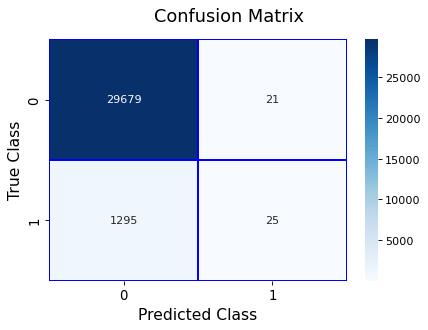

In [44]:
plt.figure(dpi=80)
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues',linecolor='b',linewidths=0.2)
plt.ylabel('True Class',fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Predicted Class',fontsize=14)
plt.xticks(fontsize=12)
plt.suptitle('Confusion Matrix',fontsize=16)

In [45]:
# FIt the Random Forest Model
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train1,y_train)
y_pred_rf = model_rf.predict(X_test1)

C:\Users\Binal Shah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [46]:
cm = confusion_matrix(y_test,y_pred_rf)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_rf, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      1.00      0.98     29700
     class 1       0.57      0.01      0.03      1320

    accuracy                           0.96     31020
   macro avg       0.76      0.51      0.50     31020
weighted avg       0.94      0.96      0.94     31020



Text(0.5, 0.98, 'Confusion Matrix')

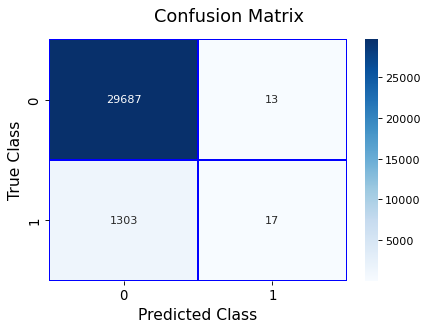

In [47]:
plt.figure(dpi=80)
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues',linecolor='b',linewidths=0.2)
plt.ylabel('True Class',fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Predicted Class',fontsize=14)
plt.xticks(fontsize=12)
plt.suptitle('Confusion Matrix',fontsize=16)

In [48]:
## Fit the Knn Model
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train1,y_train)
y_pred_knn = model_knn.predict(X_test1)

C:\Users\Binal Shah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [49]:
cm = confusion_matrix(y_test,y_pred_knn)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_knn, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      0.99      0.98     29700
     class 1       0.26      0.06      0.10      1320

    accuracy                           0.95     31020
   macro avg       0.61      0.53      0.54     31020
weighted avg       0.93      0.95      0.94     31020



Text(0.5, 0.98, 'Confusion Matrix')

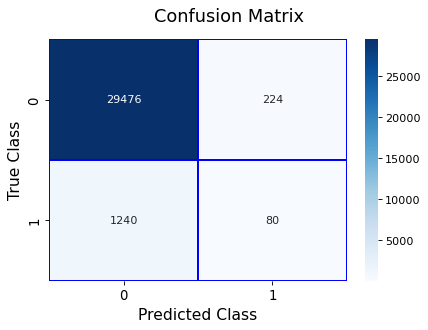

In [50]:
plt.figure(dpi=80)
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues',linecolor='b',linewidths=0.2)
plt.ylabel('True Class',fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Predicted Class',fontsize=14)
plt.xticks(fontsize=12)
plt.suptitle('Confusion Matrix',fontsize=16)

In [51]:
#SMOTE(resampling the data because of imbalance)
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_resample(X_train1, y_train)
print (y_train.value_counts() , np.bincount(y_train_res))

0    60300
1     2680
Name: default, dtype: int64 [60300 60300]


In [52]:
# fit the logistic model
model_lr = LogisticRegression()
model_lr.fit(x_train_res, y_train_res)
# evaluate the model
yhat = model_lr.predict(X_test1)
# evaluate predictions
# roc_curve = roc_curve(y_test, yhat)
# print (roc_curve)
cm = confusion_matrix(y_test,yhat)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, yhat, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.74      0.85     29700
     class 1       0.11      0.72      0.19      1320

    accuracy                           0.74     31020
   macro avg       0.55      0.73      0.52     31020
weighted avg       0.95      0.74      0.82     31020



C:\Users\Binal Shah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 0.98, 'Confusion Matrix')

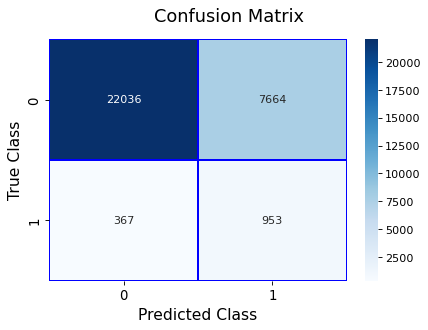

In [53]:
plt.figure(dpi=80)
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues',linecolor='b',linewidths=0.2)
plt.ylabel('True Class',fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Predicted Class',fontsize=14)
plt.xticks(fontsize=12)
plt.suptitle('Confusion Matrix',fontsize=16)

C:\Users\Binal Shah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Binal Shah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'ROC Curve')

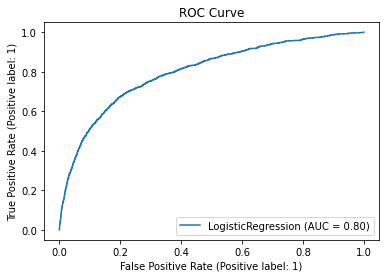

In [54]:
metrics.plot_roc_curve(model_lr,X_test1,y_test,drop_intermediate=False,pos_label=1)
plt.title("ROC Curve")

In [55]:
accuracy_score(y_test, yhat)

0.7411025145067698

In [56]:
# FIt the Random Forest Model
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train_res,y_train_res)
y_pred_rf = model_rf.predict(X_test1)
cm = confusion_matrix(y_test,y_pred_rf)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_rf, target_names=target_names))

C:\Users\Binal Shah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

     class 0       0.97      0.95      0.96     29700
     class 1       0.19      0.27      0.23      1320

    accuracy                           0.92     31020
   macro avg       0.58      0.61      0.59     31020
weighted avg       0.93      0.92      0.93     31020



Text(0.5, 0.98, 'Confusion Matrix')

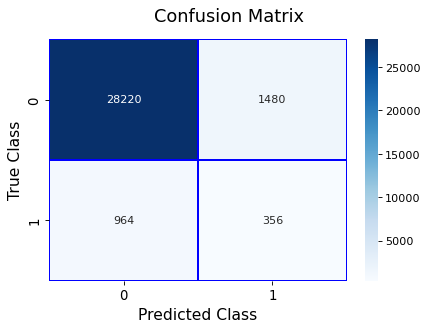

In [57]:
plt.figure(dpi=80)
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues',linecolor='b',linewidths=0.2)
plt.ylabel('True Class',fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Predicted Class',fontsize=14)
plt.xticks(fontsize=12)
plt.suptitle('Confusion Matrix',fontsize=16)

C:\Users\Binal Shah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Binal Shah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'ROC Curve')

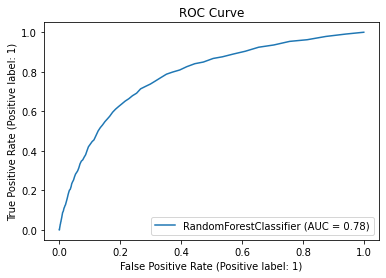

In [58]:
metrics.plot_roc_curve(model_rf,X_test1,y_test,drop_intermediate=False,pos_label=1)
plt.title("ROC Curve")

In [59]:
## Fit the Knn Model
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train_res,y_train_res)
y_pred_knn = model_knn.predict(X_test1)
cm = confusion_matrix(y_test,y_pred_knn)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_knn, target_names=target_names))

C:\Users\Binal Shah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

     class 0       0.97      0.85      0.90     29700
     class 1       0.10      0.38      0.16      1320

    accuracy                           0.83     31020
   macro avg       0.53      0.61      0.53     31020
weighted avg       0.93      0.83      0.87     31020



Text(0.5, 0.98, 'Confusion Matrix')

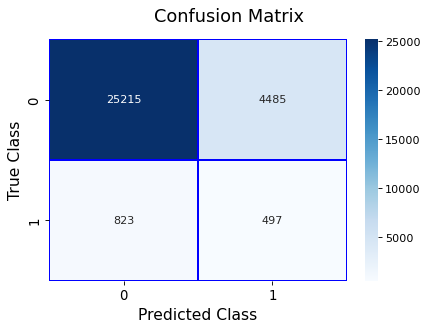

In [60]:
plt.figure(dpi=80)
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues',linecolor='b',linewidths=0.2)
plt.ylabel('True Class',fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Predicted Class',fontsize=14)
plt.xticks(fontsize=12)
plt.suptitle('Confusion Matrix',fontsize=16)

C:\Users\Binal Shah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Binal Shah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'ROC Curve')

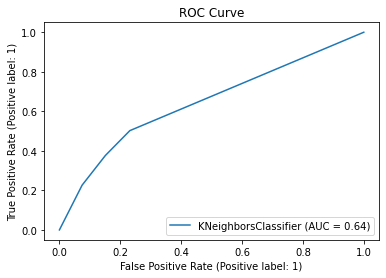

In [61]:
metrics.plot_roc_curve(model_knn,X_test1,y_test,drop_intermediate=False,pos_label=1)
plt.title("ROC Curve")

In [81]:
#On test Data

In [82]:
X_test_data = test_data.drop(['A2','A5','A9','A16','A12','A3','A24', 'A6','A8','A11','A14', 'A15','A17','default'], axis=1)
y_test_data = test_data['default']

In [83]:
X_test_data=robust_scaler.transform(X_test_data)

In [85]:
y_pred_lr = model_lr.predict(X_test_data)
results1 = pd.DataFrame(data = y_pred_lr)
results1.to_csv('results1.csv', index=False)

In [89]:
cm = confusion_matrix(y_test_data,y_pred_lr)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test_data, y_pred_lr, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.73      0.82     10000
     class 1       0.29      0.74      0.42      1500

    accuracy                           0.73     11500
   macro avg       0.62      0.73      0.62     11500
weighted avg       0.86      0.73      0.77     11500



Text(0.5, 1.0, 'ROC Curve')

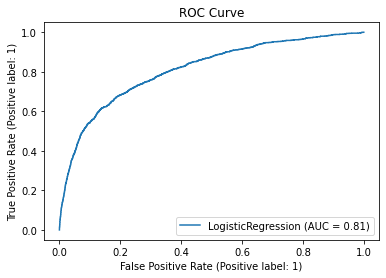

In [95]:
metrics.plot_roc_curve(model_lr,X_test_data,y_test_data,drop_intermediate=False,pos_label=1)
plt.title("ROC Curve")

In [87]:
y_pred_rf = model_rf.predict(X_test_data)
results2 = pd.DataFrame(data = y_pred_rf)
results2.to_csv('results2.csv', index=False)

In [90]:
cm = confusion_matrix(y_test_data,y_pred_rf)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test_data, y_pred_rf, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.90      0.95      0.92     10000
     class 1       0.45      0.27      0.34      1500

    accuracy                           0.86     11500
   macro avg       0.67      0.61      0.63     11500
weighted avg       0.84      0.86      0.85     11500



Text(0.5, 1.0, 'ROC Curve')

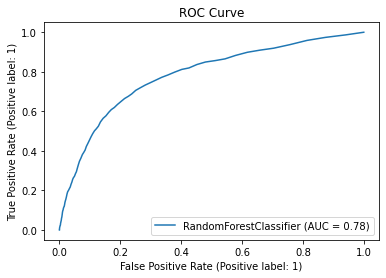

In [94]:
metrics.plot_roc_curve(model_rf,X_test_data,y_test_data,drop_intermediate=False,pos_label=1)
plt.title("ROC Curve")

# Building Classification Models

## Defining the functions

Our main classifying function will consist of function to search best model parameters i.e. Hyperparameter tuning & Model Selection and function to plot confusion matrix, so first we define these two functions first

## HyperParameter tuning and model selection functions

In [62]:
#f1 scoring function
f1 = metrics.make_scorer(metrics.f1_score,average='weighted')

In [63]:
def optimizer(clf,parameters,X,y,n_folds=5):
    """
    Funtion optimizer
    ------------------------
    This function perform cross-validation using Grid search and is used for hyperparameter tuning
    and model selection. This function is called in the classify function which performs the 
    classification. 
    
    Parameters
    ------------------------
    clf          : The classifier
    parameters   : A dictionary of parameters on which grid search is to be performed
    X            : Dataframe of features
    y            : A Dataframe of responses/target
    n_folds      : Number of folds for cross-validation

    Returns
    -------------------------
    best_estimator : The best hyperparameters for the classifier
    """
    
    cv = KFold(n_splits=n_folds,shuffle=True)
    
    grid = GridSearchCV(estimator=clf,param_grid=parameters,cv=cv,n_jobs=-1,scoring=f1)
    
    grid.fit(X,y)
    
    print("Most Accurate Model:{} \nScore:{}".format(grid.best_params_,grid.best_score_))
    
    best_estimator = grid.best_estimator_
    
    return best_estimator

In [64]:
def plot_confusion_matrix(cm):
    
    plt.figure(dpi=80)
    sns.heatmap(cm,annot=True,fmt='g',cmap='Blues',linecolor='b',linewidths=0.2)
    plt.ylabel('True Class',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xlabel('Predicted Class',fontsize=14)
    plt.xticks(fontsize=12)
    plt.suptitle('Confusion Matrix',fontsize=16)

In [65]:
def classify(clf,parameters,X_train1,X_test1,y_train,y_test,n_folds=5):
    """
    Funtion classify
    ------------------------
    This function performs classification using the best hyperparameters, which are determined
    using optimizer and then tests the model on the test set. This function prints the training
    and test accuracy of the classifier and plots the confusion matrix.
    
    Parameters
    ------------------------
    clf          : The classifier
    parameters   : A dictionary of parameters on which grid search is to be performed
    Xtrain       : Train Dataframe of features
    Xtest        : Test Dataframe of features
    ytrain       : Train Dataframe of responses/target
    ytest        : Test Dataframe of responses/target
    n_folds      : Number of Cross-Valiation folds
    
    
    Returns
    -------------------------
    Prints the training and test accuracy.
    Prints Classification Report.
    Plots the confusion matrix.
    
    """
    
    ## step-1. Hyperparameter tuning and model selection
    
    clf = optimizer(clf,parameters,X_train1,y_train,n_folds=n_folds)  # Returns best estimator
    
     # Fitting the Tuned classifier
    clf.fit(X_train1,y_train)
    
    # Calculate Training Accuracy
    Training_accuracy = clf.score(X_train1,y_train)
    
    # Calculate Test Accuracy
    Test_accuracy = clf.score(X_test1,y_test)
    
    print('\n')
    print('Training Accuracy: {}'.format(Training_accuracy))
    print('\n')
    print('Test Accuracy: {}'.format(Test_accuracy))
    print('\n')
    
    
    # Confusion Matrix
    
    cm = metrics.confusion_matrix(y_test,clf.predict(X_test1))
    plot_confusion_matrix(cm)                                       # Calling the function confusion matrix
    
    # Classification Report:
    
    print(metrics.classification_report(y_test,clf.predict(X_test1)))

# 4.Resampling Methods
We will Use 2 undersampling, 2 oversampling and 1 combine sampling methods

## Undersampling 
1.Random Undersampling
2.Nearmiss(version-2)

## Oversampling 
1.Random Oversampling
2.SMOTE

In [66]:
def RUS_(X_train1,y_train):
    
    """
    Funtion RUS_
    -----------------------------
    This function performs Random Under Sampling without replacement on the data.
    
    Parameters
    ------------------------
    
    X_train         : Dataframe containing only training features
    y_train         : A dataframe of training responses

    
    Returns
    -------------------------
    X_train_RUS : Training Dataframe of features and target 'TARGET' 
    
    """
    sampler = RandomUnderSampler(random_state=101)
    X_train_RUS,y_train_RUS = sampler.fit_resample(X_train1,y_train)
    
    X_Train_RUS = pd.DataFrame(data=X_train_RUS,columns=X_train1.columns)
    X_Train_RUS['default'] = y_train_RUS
    
    return X_Train_RUS

In [67]:
def NearMiss_(X_train1,y_train,neighbours = 3):
    
    
    """
    Funtion NearMiss_
    -----------------------------
    This function performs Random Under Sampling without replacement on the data.
    
    Parameters
    ------------------------
    
    X_train         : Dataframe containing only training features
    y_train         : A dataframe of training responses
    neighbours      : Size of neighbourhood to consider
    Returns
    -------------------------
    X_train_NM : Training Dataframe of features and target 'TARGET' 
    
    """
        
    sampler = NearMiss(version=2,n_neighbors=neighbours)
    X_train_NM, y_train_NM = sampler.fit_resample(X_train1,y_train)
    
    X_Train_NM = pd.DataFrame(data=X_train_NM,columns = X_train1.columns)
    X_Train_NM['default'] = y_train_NM
    
    return X_Train_NM

In [68]:
def ROS_(X_train1,y_train):
    
    """
    Funtion ROS_
    -----------------------------
    This function performs Random over Sampling of data
    
    Parameters
    ------------------------
    
    X_train         : Dataframe containing only training features
    y_train         : A dataframe of training responses

    
    Returns
    -------------------------
    X_train_ROS : Training Dataframe of features and target 'TARGET' 
    
    """
    sampler = RandomOverSampler(random_state=101)
    X_train_ROS,y_train_ROS = sampler.fit_resample(X_train1,y_train)
    
    X_Train_ROS = pd.DataFrame(data=X_train_ROS,columns=X_train1.columns)
    X_Train_ROS['default'] = y_train_ROS
    
    return X_Train_ROS

In [69]:
def SMOTE_(X_train1,y_train,neighbors):
    """
    Funtion SMOTE
    -----------------------------
    This function performs SMOTE on the data.
    
    Parameters
    ------------------------
    X_train         : Dataframe containing only training features
    y_train         : A dataframe of training responses
    neighbours      : Size of neighbourhood to consider
    
    
    Returns
    -------------------------
    X_Train_SMOTE : Training Dataframe of features and target 'TARGET'
    
    """
    
    sampler = SMOTE(k_neighbors=neighbors,random_state=101)
    X_train_SMOTE,y_train_SMOTE = sampler.fit_resample(X_train1,y_train)
    
    X_Train_SMOTE = pd.DataFrame(data=X_train_SMOTE,columns=X_train1.columns)
    X_Train_SMOTE['default'] = y_train_SMOTE
    
    return X_Train_SMOTE

#  Constructing the Resampled data-sets

In [70]:
## Random Undersampling
X_train_RUS = RUS_(X_train1,y_train)

## NearMiss(Version-2)
X_train_NearMiss = NearMiss_(X_train1,y_train,3)

## Random Oversampling
X_train_ROS = ROS_(X_train1,y_train)

## SMOTE
X_train_SMOTE = SMOTE_(X_train1,y_train,3)

[Text(0.5, 1.0, 'SMOTE')]

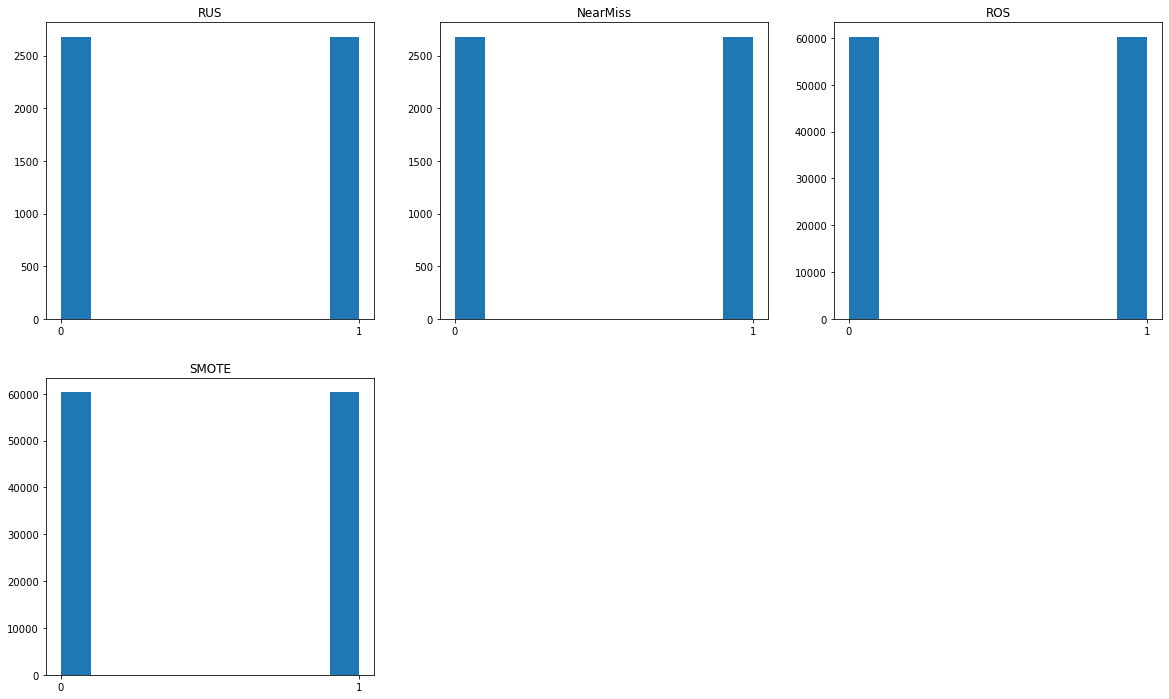

In [71]:
plt.figure(figsize=(20,12))
gs = GridSpec(2,3)

ax = plt.subplot(gs[0])
plt.hist(X_train_RUS['default'])
plt.xticks(np.arange(0,2))
ax.set(title = 'RUS')


ax1 = plt.subplot(gs[1])
plt.hist(X_train_NearMiss['default'])
plt.xticks(np.arange(0,2))
ax1.set(title = 'NearMiss')


ax2 = plt.subplot(gs[2])
plt.hist(X_train_ROS['default'])
plt.xticks(np.arange(0,2))
ax2.set(title = 'ROS')


ax3 = plt.subplot(gs[3])
plt.hist(X_train_SMOTE['default'])
plt.xticks(np.arange(0,2))
ax3.set(title = 'SMOTE')

# 4.4 Spliting the Test Data in Feature and Target 

In [72]:
# RUS
Xtrain_RUS = X_train_RUS.drop('default',axis=1)
ytrain_RUS = X_train_RUS['default']

# NearMiss
Xtrain_NearMiss = X_train_NearMiss.drop('default',axis=1)
ytrain_NearMiss = X_train_NearMiss['default']

# ROS
Xtrain_ROS = X_train_ROS.drop('default',axis=1)
ytrain_ROS = X_train_ROS['default']

# SMOTE
Xtrain_SMOTE = X_train_SMOTE.drop('default',axis=1)
ytrain_SMOTE = X_train_SMOTE['default']

# 5.Training & Evaluation of Classification models

## 5.1 Logistic Regression with RUS

Most Accurate Model:{'C': 1, 'penalty': 'l1'} 
Score:0.7385556082134618


Training Accuracy: 0.7402985074626866


Test Accuracy: 0.7365892972275951


              precision    recall  f1-score   support

           0       0.98      0.74      0.84     29700
           1       0.11      0.73      0.19      1320

    accuracy                           0.74     31020
   macro avg       0.55      0.74      0.52     31020
weighted avg       0.95      0.74      0.81     31020



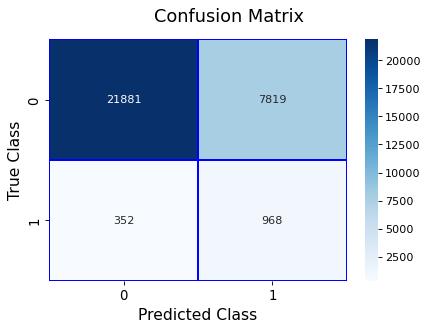

In [73]:
log_RUS = LogisticRegression(class_weight='balanced',solver='liblinear')
warnings.filterwarnings("ignore")

#Parameter for grid search

parameters = {'penalty':['l1','l2'],
             'C':[0.01,0.1,1,10]}

#Returns a Test result 
#t0 = time.time()
classify(clf=log_RUS,parameters=parameters,X_train1=Xtrain_RUS,X_test1=X_test1,y_train=ytrain_RUS,y_test=y_test,n_folds=5)
#t1= time.time()
#print('Time Taken: {} sec'.format(t1-t0))

## 5.2 Logistic Regression with NearMiss

Most Accurate Model:{'C': 0.01, 'penalty': 'l1'} 
Score:0.9274550493630628


Training Accuracy: 0.9300373134328358


Test Accuracy: 0.20970341715022567


              precision    recall  f1-score   support

           0       0.97      0.18      0.30     29700
           1       0.05      0.87      0.09      1320

    accuracy                           0.21     31020
   macro avg       0.51      0.53      0.19     31020
weighted avg       0.93      0.21      0.29     31020



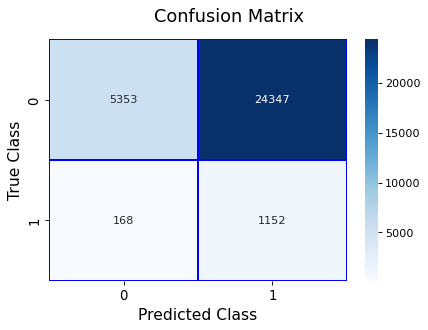

In [74]:
log_NM = LogisticRegression(class_weight='balanced',solver='liblinear')

#Parameter for grid search

parameters = {'penalty':['l1','l2'],
             'C':[0.01,0.1,1,10,100]}
#Returns a Test result 
#t0 = time.time()
classify(clf=log_NM,parameters=parameters,X_train1=Xtrain_NearMiss,X_test1=X_test1,y_train=ytrain_NearMiss,y_test=y_test)
#t1= time.time()
#print('Time Taken: {} sec'.format(t1-t0))

## 5.3 Logistic Regression with ROS

Most Accurate Model:{'C': 100, 'penalty': 'l1'} 
Score:0.7396518817668182


Training Accuracy: 0.7394776119402985


Test Accuracy: 0.7395873629916183


              precision    recall  f1-score   support

           0       0.98      0.74      0.84     29700
           1       0.11      0.73      0.19      1320

    accuracy                           0.74     31020
   macro avg       0.55      0.73      0.52     31020
weighted avg       0.95      0.74      0.82     31020



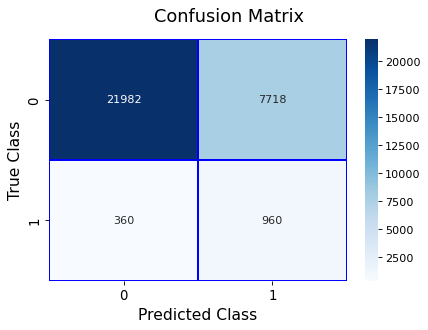

In [75]:
log_ROS = LogisticRegression(class_weight='balanced',solver='liblinear')

#Parameter for grid search

parameters = {'penalty':['l1','l2'],
             'C':[0.01,0.1,1,10,100]}
#Returns a Test result 
#t0 = time.time()
classify(clf=log_ROS,parameters=parameters,X_train1=Xtrain_ROS,X_test1=X_test1,y_train=ytrain_ROS,y_test=y_test)
#t1= time.time()
#print('Time Taken: {} sec'.format(t1-t0))

# 5.4 Logistic Regression with SMOTE

Most Accurate Model:{'C': 0.01, 'penalty': 'l2'} 
Score:0.7440276640223684


Training Accuracy: 0.7441956882255389


Test Accuracy: 0.7405867182462927


              precision    recall  f1-score   support

           0       0.98      0.74      0.85     29700
           1       0.11      0.72      0.19      1320

    accuracy                           0.74     31020
   macro avg       0.55      0.73      0.52     31020
weighted avg       0.95      0.74      0.82     31020



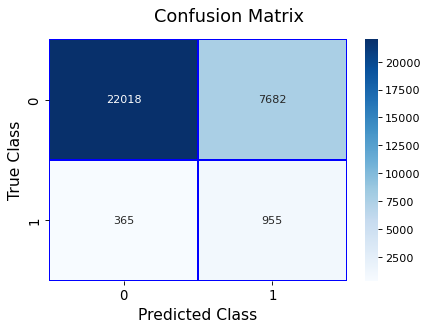

In [76]:
log_SMOTE = LogisticRegression(class_weight='balanced',solver='liblinear')

#Parameter for grid search

parameters = {'penalty':['l1','l2'],
             'C':[0.01,0.1,1,10,100]}
#Returns a Test result 
#t0 = time.time()
classify(clf=log_SMOTE,parameters=parameters,X_train1=Xtrain_SMOTE,X_test1=X_test1,y_train=ytrain_SMOTE,y_test=y_test)
#t1= time.time()
#print('Time Taken: {} sec'.format(t1-t0))

# 5.6 Random Forest with RUS

Most Accurate Model:{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200} 
Score:0.765304703956497


Training Accuracy: 0.8414179104477612


Test Accuracy: 0.7656028368794326


              precision    recall  f1-score   support

           0       0.98      0.77      0.86     29700
           1       0.12      0.72      0.21      1320

    accuracy                           0.77     31020
   macro avg       0.55      0.74      0.54     31020
weighted avg       0.95      0.77      0.83     31020



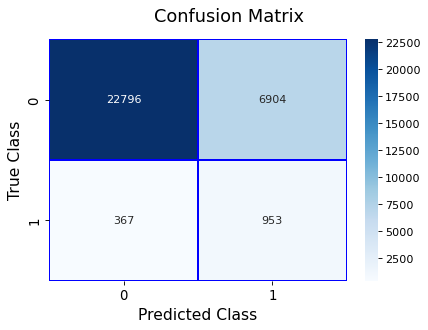

In [77]:
RF_RUS = RandomForestClassifier(class_weight='balanced',random_state=101)
warnings.filterwarnings("ignore")

#Parameter for grid search

parameters = {'n_estimators':[10,50,100,200,500],
             'max_depth':[3,4,5,6,7,8],
             'max_features':['log2','sqrt'],
             'criterion':['gini','entropy']}

#Returns a Test result 
#t0 = time.time()
classify(clf=RF_RUS,parameters=parameters,X_train1=Xtrain_RUS,X_test1=X_test1,y_train=ytrain_RUS,y_test=y_test,n_folds=5)
#t1= time.time()
#print('Time Taken: {} sec'.format(t1-t0))

# 5.7 Random Forest with NearMiss

Most Accurate Model:{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 100} 
Score:0.9439219428469405


Training Accuracy: 0.9688432835820896


Test Accuracy: 0.14384268214055448


              precision    recall  f1-score   support

           0       0.96      0.11      0.20     29700
           1       0.04      0.89      0.08      1320

    accuracy                           0.14     31020
   macro avg       0.50      0.50      0.14     31020
weighted avg       0.92      0.14      0.19     31020



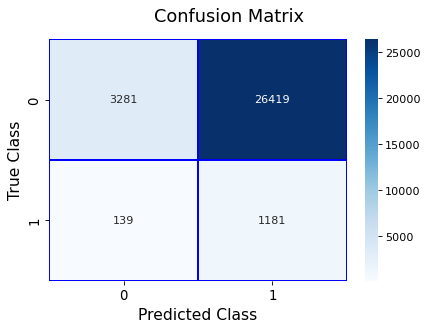

In [78]:
RF_NM = RandomForestClassifier(class_weight='balanced',random_state=101)
warnings.filterwarnings("ignore")

#Parameter for grid search

parameters = {'n_estimators':[10,50,100,200,500],
             'max_depth':[3,4,5,6,7,8],
             'max_features':['log2','sqrt'],
             'criterion':['gini','entropy']}

#Returns a Test result 
#t0 = time.time()
classify(clf=RF_NM,parameters=parameters,X_train1=Xtrain_NearMiss,X_test1=X_test1,y_train=ytrain_NearMiss,y_test=y_test,n_folds=5)
#t1= time.time()
#print('Time Taken: {} sec'.format(t1-t0))